<a href="https://colab.research.google.com/github/RobJavVar/DataSciencePsychNeuro/blob/master/ExerciseSubmissions/04_techniques-for-data-cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4: Data cleansing

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository.

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data.

In [94]:
setwd("~/Documents/DataSciencePsychNeuro/Exercise datasets/lexDat")
data_toclean = read.csv("LexicalData_toclean.csv")
head(data_toclean, 10)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364
7,236,5,1,826,censorship,false,-0.043
8,236,6,1,928,beckon,false,0.251
9,236,8,1,"1,047",superscribe,false,0.595


The **LexicalData_toclean.csv** file contains the variables `Sub_ID` (Subject ID), `Trial` (the trial number), `D_RT` (reaction time) and `D_Word` (the word they were responding to).

---
## 2. Data Cleansing (4 points)

There are three things we want to do to make this data more useable:
* Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
* Get rid of rows where the reaction times are missing (hint: you can use the `filter` function from `tidyverse`, but you'll need to load the library).
* Make sure all of the reaction times are positive.

Write code that will copy the data to a new variable and make the above changes.

In [95]:
install.packages("tidyverse") 
library(tidyverse)

clean_step1 = data_toclean #copy to new variable first
#dim(clean_step1)

clean_step1$D_RT = gsub(",", "", clean_step1$D_RT) #remove commas from RTs
clean_step1$D_RT = as.numeric(clean_step1$D_RT) #convert RT values from string to numeric

clean_step1 <- clean_step1 %>% #using tidyverse filter function, remove the rows that have NAs as RTs
    filter(!is.na(clean_step1$D_RT))

# class(clean_step1$D_RT)
clean_step1$D_RT = abs(unclass(clean_step1$D_RT)) #I got the tip from GPT to use unclass, because abs() would not work on the RT variable even if it's numeric




The downloaded binary packages are in
	/var/folders/bv/wcq8jkrd26sg1y3bg18qjglh0000gp/T//Rtmpbnp328/downloaded_packages


For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing.

> *Write your response here.*
> * First action: domain format error (syntactical anomaly)
> * Second action: missing values (coverage anomaly)
> * Third action: integrity constraint violations (semantic anomaly)

---
## 3. Data Manipulation with Tidyverse (4 points)

Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells.

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [96]:
# INSERT CODE HERE
summary <- clean_step1 %>% 
    summarise(n_observations=n(), #get total observations
              RT_mean = mean(D_RT),
              RT_std = sd(D_RT)
              )
summary

n_observations,RT_mean,RT_std
<int>,<dbl>,<dbl>
62607,807.2667,377.4396


Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one.

In [98]:
clean_step1 <- clean_step1 %>%
    mutate(trial_min_one = Trial -1)

#head(clean_step1, 10)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,trial_min_one
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,157,1,1,710,browse,false,-0.437,0
2,67,1,1,1094,refrigerant,false,0.825,0
3,120,1,1,587,gaining,false,-0.645,0
4,21,1,1,984,cheerless,false,0.025,0
5,236,1,1,577,pattered,false,-0.763,0
6,236,2,1,715,conjures,false,-0.364,1
7,236,5,1,826,censorship,false,-0.043,4
8,236,6,1,928,beckon,false,0.251,5
9,236,8,1,1047,superscribe,false,0.595,7


---
## 4. Plotting Data (1 point)

Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

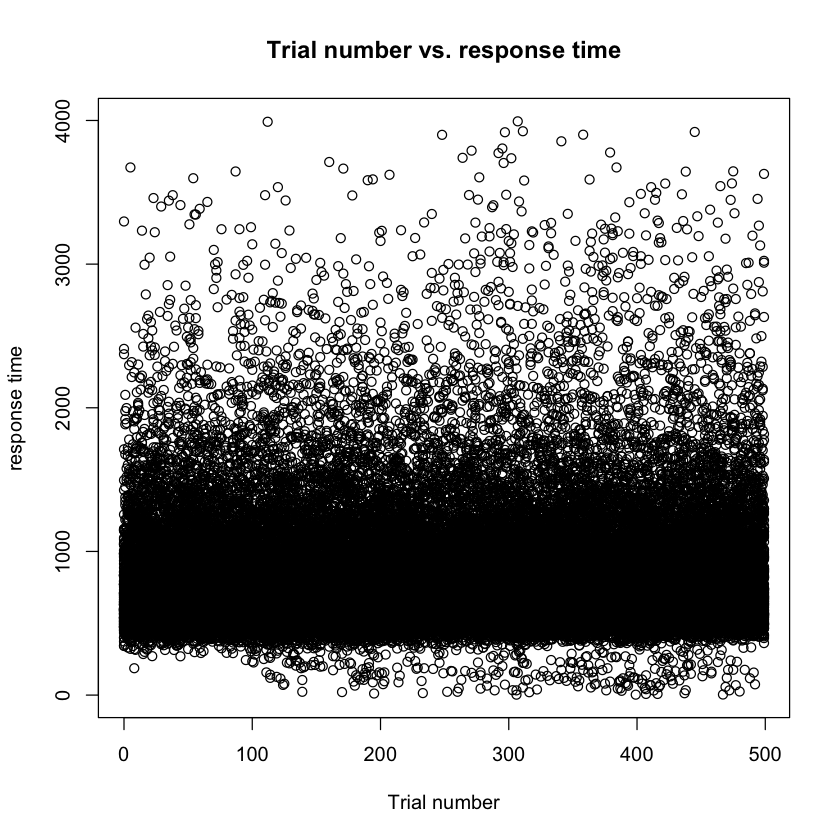

In [99]:
plot(clean_step1$trial_min_one, clean_step1$D_RT, main ="Trial number vs. response time", xlab = "Trial number", ylab = "response time") 


That's all for this assignment! When you are finished, save the notebook as Exercise4.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas.

**DUE:** 5pm EST, Feb 5, 2026

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> I did not collaborate with anyone, but beyond simple googling, I used chatGPT for the following two problems: 1)What syntax to use so that I not only modify a variable, but also update it; 2)Figure out how to use abs() with the table's values without an error. Both of these were relevant to Part 2: Data Cleansing.